<a href="https://colab.research.google.com/github/raaraya1/Personal-Proyects/blob/main/Cursos/sklearn/A_tutorial_on_statistical_learning_for_scientific_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistical learning**

Machine learning es una tecnica que esta cobrando importancia, en concordancia con el crecimiento del tamaño de las bases de datos. Los problemas van desde predecir sobre un conjunto de observaciones, clasificarlas o aprender a estructurar esta informacion.

En este tutorial se tiene por objetivo explorar metodos de aprendizaje y el uso de tecnicas de machine learning para extraer inferencias estadisticas.

## **Statistical learning: the setting and the estimator object in scikit-learn**

### **Datasets**

sklearn trata con informacion que esencialmente se encuentra representada como **2D arrays**. Estos pueden ser entendidos como una lista multi-dimensional en la cual en la primera entrada se almacenan las muestras (**samples**) y en la segunda las caracteristicas (**features**).

In [ ]:
# A simple example shipped with scikit-learn: iris dataset
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
data.shape

# Aqui podemos observar que el set de datos contiene 150 observaciones
# y para cada observacion se tiene un set de 4 caracteristicas

(150, 4)

In [ ]:
# Descripcion del set de datos
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Cuando los datos no se encuentran ordenados en esta estructura **(n_samples, n_features)**, es deber nuestro arreglar los datos para que sigan esta estructura. Miremos el siguiente caso:

In [ ]:
# Estructura presente inicialmente en los datos
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

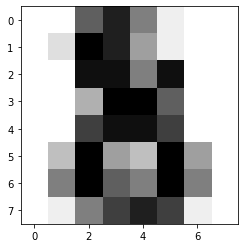

In [ ]:
# Representacion de la informacion contenida en los datos
import matplotlib.pyplot as plt
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r)

In [ ]:
# Para arreglar esta estructura deberemos hacer lo siguiente
n_samples = digits.images.shape[0] # 1797 datos
data = digits.images.reshape(n_samples, -1) # pasamos de 3 dim a 2 dim
data.shape # (1797, 8, 8) -> (1797, 8x8)

(1797, 64)

### **Estimators objects**

**Fitting data**: La unidad principal de la biblioteca de `sklearn` es el **estimador**. Un estimador es un objeto que puede aprender de los datos y tiene la capacidad de realizar **clasificaciones, regresiones o agrupaciones** o realizar transformaciones que **extraigan o filtren las caracteristicas mas utiles de los datos**.

Todos los estimadores tienen integrado el metodo `fit` el cual en la mayoria de los casos recibe como input 2d array.

```python
estimator.fit(data)
```

**Estimator parameters**: Todos los parametros de un estimador pueden ser definidos en una instancia o por la modificacion de un atributo correspondiente:

```python
estimator = Estimator(param1=1, param2=2)
estimator.param1
>> 1
```

Estimated parameters: Cuando los datos son ajustados con un estimador, los parametros son definidos a mano. Todos los parametros estimados son atributos del estimador y se pueden acceder a ellos de la siguiente manera:

```python
estimator.estimated_param_
```

## **Supervised learning: predicting an output variable from high-dimensional observations**

**Supervised learning** consiste en apreder sobre el nexo entre dos conjuntos de datos: 
- Las observaciones (X)
- La varaibles externa y, sobre la cual generalmente se pretende predecir (target o label)

Todos los estimadores de la biblioteca de sklearn tiene implementado el metodo `fit(X, y)` para ajustar el modelo a los datos y el metodo `predict(X)` para etiquetar las observaciones X.


**Classification and regression**

Si la tarea sobre la prediccion consiste en clasificar las observaciones en un numero finito de "etiquetas" (en otras palabras, nombrar el objeto mostrado), entonces se dice que estamos hablando de una tarea de **Clasificacion**. Por otro lado, si el prediccion es sobre una variable continua, entonces estamos hablando de una tarea de **regresion**.



### **Nearest neighbor and the curse of dimensionality**



**Classifying irises**

La base de datos **iris** tiene una tarea de clasificacion asociada, Asi, el objetivo es identificar 3 tipos diferentes de lirios (Setosa, Versicolour y Virginica) a traves del tipo de petalo y el ancho y largo del sepalo.

In [ ]:
import numpy as np
from sklearn import datasets
iris_X, iris_y = datasets.load_iris(return_X_y=True)
np.unique(iris_y)

array([0, 1, 2])

**Visualizacion de los datos (PCA)**

In [ ]:
# Importamos las bibliotecas
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import plotly.express as px

In [ ]:
# Cargamos los datos
iris = datasets.load_iris()

# Realizamos analisis de componentes principales
X_pca = PCA(n_components=3).fit_transform(iris.data)
y = [iris.target_names[i] for i in iris.target]

In [ ]:
# Cargamos los resultados a un DataFrame
df = pd.DataFrame(X_pca)
df['iris class'] = y
df.columns=['1st componente', '2nd componente', '3rd componente', 'iris class']
df.head()

,1st componente,2nd componente,3rd componente,iris class
0,-2.684126,0.319397,-0.027915,setosa
1,-2.714142,-0.177001,-0.210464,setosa
2,-2.888991,-0.144949,0.017900,setosa
3,-2.745343,-0.318299,0.031559,setosa
4,-2.728717,0.326755,0.090079,setosa


In [ ]:
# Graficamos los resultados
fig = px.scatter_3d(df, x='1st componente', y='2nd componente', z='3rd componente', color='iris class')
fig.show()  

**k-Nearest neighbors classifier**

El clasificador mas sencillo que existe es el **"Vecinos mas cernanos"**: Lo que se hace es buscar para cada observacion el vector de caracteristicas mas cercano.

**KNN (k nearest neighborns) classification example:**

In [ ]:
import numpy as np
from sklearn.datasets import load_iris

In [ ]:
np.random.seed(0)
indices = np.random.permutation(len(iris_X)) # desordenar los datos
iris_X_train = iris_X[indices[:-10]] # seleccionar todos los datos menos los 10 ultimos
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]] # asignamos los ultimos 10 valores como testeo
iris_y_test = iris_y[indices[-10:]]

# Creamos y ajustamos el algoritmo 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier()

In [ ]:
pred = knn.predict(iris_X_test)

# Medimos los aciertos
aciertos = 0
for i in range(len(pred)): 
  if pred[i] == iris_y_test[i]: 
    aciertos += 1
aciertos # Se obtienen 9 aciertos de un total de 10

9

**The curse of dimensionality**

Para que un estimador sea eficiente, se requeire que la distancia entre dos puntos vecinos sea menor que un valor $d$, siendo este depedinte del problema. 

Para el algortimo de Knn, si los datos son descritos con una caracteristica (feature) con valores entre 0 y 1 y con un conjunto de n datos de entrenamiento, luego los nuevos datos no se encontraran mas lejos que $\frac{1}{n}$. Luego, la regla de decision del algoritmo se hará eficiente en la medida que $\frac{1}{n}$ sea pequeño en comparacion con la variacion de las caracteristicas entre distintas clases.

En consecuencia existe un numero de observaciones necesarias para entrenar al algoritmo y asegurar que este sea eficiente:

$$
n = \frac{1}{d^{p}}
$$

Siendo:

- $n$ el numero de observaciones necesarias para el entrenamiento
- $d$ la distancia entre puntos cercanos (imaginar distnacias pequeñas con valores entre 0 y 1)
- $p$ numero de dimensiones (**features**)

De esta manera, si $d \in[0, 1]$, entonces el numero de observaciones necesarias ($n$) crece de manera exponencialmente en funcion del aumento de dimensiones (**La maldicion de la dimensionalidad**) 

### **Linear model: from regression to sparsity**

**Diabetes dataset**

La base de datos "Diabetes dataset" consiste en 10 variables fisiologicas

- Edad
- Sexo 
- Peso 
- Presion sanguinea
- +6 mediciones de suero sanguineo

Todas estas medidas en 442 pacientes, con una indicacion de enfermedad progresiva pasado un año.

De esta manera la tarea es predecir el progreso de la enfermedad a partir de las variables fisiologicas

In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
diabetes_X, diabetes_y = load_diabetes(return_X_y=True)
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]


**Linear regression**

`LinearRegression` es la manera mas simple de ajustar un modelo lineal a los datos, para esto es que se debe definir una serie de parametros en funcion de reducir la suma del cuadrado de los errores residuales.

Linear models: $y=X \beta + ϵ$

- $X$: datos
- $y$: variable objetivo
- $\beta$: Coeficientes
- $ϵ$: ruido observado (errores)

In [ ]:
import numpy as np
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [ ]:
print(regr.coef_)

[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


In [ ]:
# Error cuadratico medio (MSE)
## Tambien llamado error residual para este caso
preds = regr.predict(diabetes_X_test)
MSE = np.mean((preds - diabetes_y_test)**2)
MSE

2004.5676026898211

**Coeficiente de determinacion ($R^2$)**



$$
R^{2} = (1 - \frac{u}{v})
$$

$$
u = \frac{1}{n} \sum (Y_{pred} - Y_{real})^{2}
$$

$$
v = \frac{1}{n} \sum (Y_{real} - \bar{Y_{real}})^{2}
$$

In [ ]:
# R2 (1 es prediccion perfecta y 0 seria que no existe una relacion lineal)
R2 = regr.score(diabetes_X_test, diabetes_y_test)
R2

0.5850753022690574

**Shrinkage**

Si existen pocos puntos por dimension, entonces el ruido en la observacion induce una variacion alta.

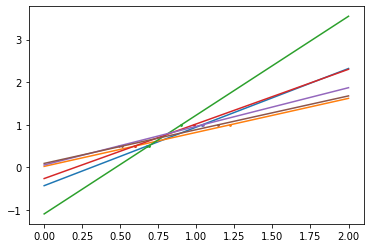

In [ ]:
X = np.c_[.5, 1].T 
y = [.5, 1]
test = np.c_[0, 2].T
regr = linear_model.LinearRegression()

import matplotlib.pyplot as plt
plt.figure()

np.random.seed(0)
for _ in range(6):
  this_X = .1*np.random.normal(size=(2, 1)) + X 
  regr.fit(this_X, y)
  plt.plot(test, regr.predict(test))
  plt.scatter(this_X, y, s=3)
  

Una solucion para aprendizaje estadistico en grandes dimensiones es shrink (encoger) los coeficientes de la regression a 0. Alguno de los 2 puntos de observaciones se encontraran **NO correlacionados**. A este metodo se le llama `Ridge`

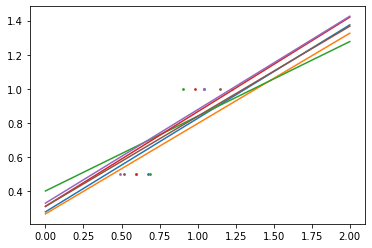

In [ ]:
regr = linear_model.Ridge(alpha=.1)

plt.figure()

np.random.seed(0)
for _ in range(6):
  this_X = .1*np.random.normal(size=(2, 1)) + X 
  regr.fit(this_X, y)
  plt.plot(test, regr.predict(test))
  plt.scatter(this_X, y, s=3)
  

Asi, mientras mayor es el parametro alpha, mayor es el sesgo (bias) y menor es la varianza.

Nosotros podemos escoger el `alpha` que minimiza el error.

In [ ]:
# De esta manera verificamos que se tiene un R2 estable
alphas = np.logspace(-4, -1, 6)
print([regr.set_params(alpha=alpha)
       .fit(diabetes_X_train, diabetes_y_train)
       .score(diabetes_X_test, diabetes_y_test)
       for alpha in alphas])

[0.5851110683883533, 0.5852073015444674, 0.585467754069849, 0.5855512036503914, 0.583071708555416, 0.570589994372801]


**Sparsity**

Como ya vimos las implicancias de trabajar con datos con muchas dimensiones, es que, aparte del metodo `ridge` ahora se introduce el metodo `lasso` para apoyer en la reduccion de las variables que poco aportan en la prediccion (o generan mucho ruido).



In [ ]:
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha)
          .fit(diabetes_X_train, diabetes_y_train)
          .score(diabetes_X_test, diabetes_y_test)
          for alpha in alphas]
best_alpha = alphas[np.argmax(scores)]
regr.alpha = best_alpha
regr.fit(diabetes_X_train, diabetes_y_train)

Lasso(alpha=0.025118864315095794)

In [ ]:
# Aqui podemos observar que el algoritmo no utilizara la primera y sexta variables
regr.coef_

array([   0.        , -212.43764548,  517.19478111,  313.77959962,
       -160.8303982 ,   -0.        , -187.19554705,   69.38229038,
        508.66011217,   71.84239008])

**Different algorith for the same problem**

En general se puede abordar un problema con mas de un algoritmo. En particular, y para un problema de regression similar a este, si el set de datos es grande, podemo utilizar el objeto `Lasso`, pero si el set de datos es pequeño se recomienda utilizar el objeto `LassoLars` .

**Classification**

Para problemas de clasificacion, al igual como trabajabamos con la base de datos `iris`, el metodo de regresion lineal no es la manera optima de resolverlo. Asi, una manera de ajustarse a este tipo de problemas es utilizando la funcion sigmoide o funcion logistica.

$$
y = sigmoide(X \beta - offset) + ϵ = \frac{1}{1 + e^{-X \beta + offset}} + ϵ
$$

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
iris_X_train = iris.data[:-10]
iris_y_train = iris.target[:-10]
iris_X_test = iris.data[-10:0]
iris_y_test = iris.target[-10:0]
log = LogisticRegression(C=1e5)
log.fit(iris_X_train, iris_y_train)


LogisticRegression(C=100000.0)

Esto se conoce como **Regresion Logistica**

In [ ]:
# Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets


In [ ]:
# Cargamos los datos
iris = datasets.load_iris()
X = iris.data[:, :2] # En esta parte solo vamos a trabajar con 2 caracteristicas
y = iris.target

In [ ]:
# Llamamos al clasificador y lo ajustamos con los datos
clf = LogisticRegression(C=1e5)
clf.fit(X, y)

LogisticRegression(C=100000.0)

In [ ]:
# Lo que vamos a hacer ahora es graficar los limites que define el clasificador
## x1 y x2 van a ser las caracteristicas que vamos a ocupar
x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02 # Salto que vamos dando
x1_i = np.arange(x1_min, x1_max, h)
x2_i = np.arange(x2_min, x2_max, h)
x1_x1, x2_x2 = np.meshgrid(x1_i, x2_i)
x2_x2.shape

(171, 231)

In [ ]:
# Ahora hacemos una prediccion de clasificacion para cada par de puntos
y_pred = clf.predict(np.c_[x1_x1.ravel(), x2_x2.ravel()]) # con .ravel() aplanamos y con c_[] concatenamos
y_pred = y_pred.reshape(x1_x1.shape) # reestructuramos 
y_pred.shape

(171, 231)

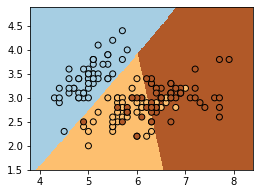

In [ ]:
# Ahora generamos la figura y agregamos los elementos al grafico
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(x1_x1, x2_x2, y_pred, cmap=plt.cm.Paired)

# Lo que vamos a hacer ahora es agregar los puntos de que usaron para ajustar 
# al algoritmo (en este caso utilizamos todas las observaciones)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlim(x1_x1.min(), x1_x1.max())
plt.ylim(x2_x2.min(), x2_x2.max())
plt.show()

**Multiclass classification**

Si tu tienes varias clases que predecir, una opcion que tu puedes usar es ajustar `one-versus-all classifier` y luego asignarle un voto a cada algoritmo para tomar la decision final.

**Shrinkage and sparsitu with logistic regression**

El parametro `C` controla el nivel de regularizacion en el objeto `LogisticRegression`. Asi, un valor alto de `C` resulta en menor regularizacion. `penalty="12"` es para usar **Shrinkage** mientras que con `penalty="11"` se usa **Sparsity**

### **Ejercicio**


Trata de clasificar los datos del set de digitos con **nearest neighborn** y con **linear model**. Deja al menos el 10% de los datos para testeo y por ultimo corrobora el desempeño de cada uno.

In [ ]:
# Importamos bibliotecas
from sklearn import datasets, neighbors, linear_model
import numpy as np

In [ ]:
# Cargamos los datos y definimos set de entrenamiento y testeo
X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_digits = X_digits / X_digits.max() # normalizar

# 10% de los datos
k = int(np.round(0.1*X_digits.shape[0], 0))

# Sets se entrenamiento y validacion
X_train = X_digits[:-k] 
y_train = y_digits[:-k]
X_test = X_digits[-k:]
y_test = y_digits[-k:]

In [ ]:
# Funcion para medir el rendimiento
def accuracy(y_pred, y_true):
  return np.sum([1 for i in range(len(y_pred)) if y_pred[i] == y_true[i]])/ len(y_pred)

#### Nearest Neighborn

In [ ]:
# Nearest Neighborn
clf1 = neighbors.KNeighborsClassifier(n_neighbors=10)
clf1.fit(X_train, y_train)

# Generamos las predicciones
y_preds = clf1.predict(X_test) 

# Medimos el rendimiento
acc = accuracy(y_preds, y_test)
acc

0.9611111111111111

#### Linear model

In [ ]:
# Nearest Neighborn
clf2 = linear_model.LogisticRegression()
clf2.fit(X_train, y_train)

# Generamos las predicciones
y_preds = clf2.predict(X_test) 

# Medimos el rendimiento
acc = accuracy(y_preds, y_test)
acc

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9333333333333333

### **Support vector machines (SVMs)**

**Linear SVMs**

**Support Vectors Machines** pertencen a la familia de modelos que descriminan. Asi, estos buscan la combinacion de muestras para construir un plano que maximice el margen entre 2 clases.

La regularizacion se ajusta con el parametro `C`, el cual a menor valor implica que el margen es calculado utilizando un mayor numero de observaciones alrededor de la linea divisora. Por otro lado, un `C` mas grande implica un uso mas acotado de las observaciones entre las lineas divisoras.

**SVMS** pueden ser utilizados tanto en tareas de **regression (SVR - Support Vector Regression)** o para tareas de **clasificacion (SVC - Support Vector Classification)**


In [ ]:
from sklearn import svm 
from sklearn.datasets import load_iris

X_train = load_iris().data[:-20]
y_train = load_iris().target[:-20]

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
def accuracy_clf(y_pred, y_test):
  return np.sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]]) / len(y_pred)

In [ ]:
x_test = load_iris().data[-20:]
y_test = load_iris().target[-20:]

y_pred = clf.predict(x_test)
acc = accuracy_clf(y_pred, y_test)
acc # 18 aciertos de 20 obervaciones

0.9

**Warning: Normalizing data**

Para muchos de los estimadores, incluyecndo SVMs, pueden presentar problemas en sus predicciones si antes no se asegura de trabajar con los datos normalizados

Normalizemos entonces para ver si existen mejoras.

In [ ]:
# Corregimos los sets de entrenamiento y validacion
# Normalizamos por categoria (son 4)
X = load_iris().data
x1 = X[:, 0] / X[:, 0].max()
x2 = X[:, 1] / X[:, 1].max()
x3 = X[:, 2] / X[:, 2].max()
x4 = X[:, 3] / X[:, 3].max()
X = np.c_[x1, x2, x3, x4]
X_train = X[:-20]
X_test = X[-20:]

# Volvemos a ajustar el modelo
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Generamos las predicciones y medimos el acierto
y_pred = clf.predict(X_test)
acc = accuracy_clf(y_pred, y_test)
acc 
# No se consiguio un mejor resultado, aunque tambien es cierto que podriamos
# aumentar el numero de observaciones en el set de testeo y ver si cambia

0.85

**Using kernels**

Las clases no siempre son posible separarlas de manera lineal. De esta manera, la solucion podria ser construir clasificador que utilice una funcion polinomial. Esto es posible de realizar a traves del `kernel`. 

En el grafico de abajo, se encuentran tres tipos de kernels (`linear, poly, rbf`).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

X = np.c_[
    (0.4, -0.7),
    (-1.5, -1),
    (-1.4, -0.9),
    (-1.3, -1.2),
    (-1.1, -0.2),
    (-1.2, -0.4),
    (-0.5, 1.2),
    (-1.5, 2.1),
    (1, 1),
    # --
    (1.3, 0.8),
    (1.2, 0.5),
    (0.2, -2),
    (0.5, -2.4),
    (0.2, -2.3),
    (0, -2.7),
    (1.3, 2.1),
].T
Y = [0] * 8 + [1] * 8

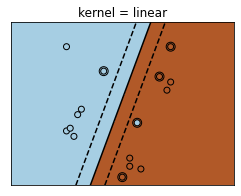

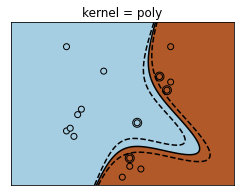

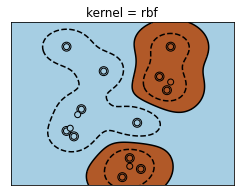

In [ ]:
# figure number
fignum = 1

# fit the model
for kernel in ("linear", "poly", "rbf"):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
    )
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors="k")

    plt.axis("tight")
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )
    plt.title(label=f'kernel = {kernel}')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
plt.show()

### **Ejercicio**

Trata de clasificar las clases 1 y 2 del conjunto de datos iris con los metodos de SVMs, con las 2 primeras caracteristicas. Deja un 10% de ambas clases para testeo.

**Precuacion**: Las clases estan ordenadas, por lo que no vale dejar el 10% de los datos al final para definir los sets de entrenamiento y validacion.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
import numpy as np

In [ ]:
# Cargamos los datos
X = load_iris().data
y = load_iris().target

# categorias en y
np.unique(y)

array([0, 1, 2])

In [ ]:
# tenemos que obtener los todos los valores de la categoria 1 y 2
X = X[y != 0]
y = y[y != 0]

# luego, para x tenemos 4 caracteristicas y se nos pide trabajar con las 2 primeras
X = X[:, :2]
X.shape

(100, 2)

In [ ]:
# ahora vamos a definir los sets de entrenamiento
## primero veamos cuanto es el 10% de los datos de cada categoria
n_1 = int(np.round(len(y[y == 1])*0.1, 0))
n_2 = int(np.round(len(y[y == 2])*0.1, 0))

X_train = np.append(X[y == 1][:-n_1, :], X[y == 2][:-n_1, :], axis=0)
X_test = np.append(X[y == 1][-n_1:, :], X[y == 2][-n_1:, :], axis=0)
y_train = np.append(y[y == 1][:-n_1], y[y == 2][:-n_1])
y_test = np.append(y[y == 1][-n_1:], y[y == 2][-n_1:])

In [ ]:
def accuracy_clf(y_pred, y_test):
  return np.sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]]) / len(y_pred)

In [ ]:
# Ahora vamos a crear y ajustar el clasificador
## Linear
clf_linear = SVC(kernel='linear')
clf_linear.fit(X_train, y_train)
y_pred = clf_linear.predict(X_test)
acc = accuracy_clf(y_pred, y_test)
print(f'Accuracy SVC linear {acc}')

# Polinomio
clf_poly = SVC(kernel='poly', degree=3)
clf_poly.fit(X_train, y_train)
y_pred = clf_poly.predict(X_test)
acc = accuracy_clf(y_pred, y_test)
print(f'Accuracy SVC poly {acc}')


# Radial basis function
clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)
y_pred = clf_rbf.predict(X_test)
acc = accuracy_clf(y_pred, y_test)
print(f'Accuracy SVC rbf {acc}')


Accuracy SVC linear 0.8
Accuracy SVC poly 0.8
Accuracy SVC rbf 0.8


## **Model selection: choosing estimators and their parameters**

### **Score, and cross-validated scores**

Como ya hemos visto, cada estimador tiene un rendimiento asociodo con el cual nosotros podemos juzgar la calidad del ajuste del algoritmo con los datos. **Mientras mas mejor**

In [ ]:
from sklearn import datasets, svm
X_digits, y_digits = datasets.load_digits(return_X_y=True)
clf = svm.SVC(C=1, kernel='linear')
X_train = X_digits[:-100] 
X_test = X_digits[-100:]
y_train = y_digits[:-100]
y_test = y_digits[-100:]

clf.fit(X_train, y_train).score(X_test, y_test)

0.98

In [ ]:
import numpy as np
def accuracy_clf(y_pred, y_true):
  return np.sum([1 for i in range(len(y_pred)) if y_pred[i] == y_true[i]]) / len(y_test)

In [ ]:
y_pred = clf.predict(X_test)
acc = accuracy_clf(y_pred, y_test) 
acc  # Es decir, es la misma funcion de accuracy que hemos estado usando siempre

0.98

Para obtener una mejor medicion sobre el acierto del algoritmo, lo que podriamos hacer es crear varias pruebas con un set de entrenamiento y validacion unico para cada una de estas.

In [ ]:
# Aqui vamos a hacer 3 pruebas de ajustes con sets de entrenamiento y validacion distintos
X_folds = np.array_split(X_digits, 3)
y_folds = np.array_split(y_digits, 3)
scores = list()
for k in range(3):
  X_train = list(X_folds) # lista con 3 elementos, cada uno contiene 599 observaciones
  X_test = X_train.pop(k) # quitamos 1 de estos 3 elementos, segun el indice k
  X_train = np.concatenate(X_train) # volvemos a agrupar los 2 elementos restantes
  
  # Hacemos lo mismo para el target
  y_train = list(y_folds)
  y_test = y_train.pop(k) 
  y_train = np.concatenate(y_train)

  # Agregamos los rendimeintos a la lista de puntajes
  clf.fit(X_train, y_train)
  acc = clf.score(X_test, y_test)
  scores.append(acc)

scores

[0.9348914858096828, 0.9565943238731218, 0.9398998330550918]

A este tipo de medicion se le llama **kfold cross-validation**

### **Cross-validation generators**

`sklearn` tiene una collecion de clases las cuales pueden ayudar a la generacion de sets de entrenamiento y validacion apuntando a estrategias de **cross-validation**

A continuacion se expone como utilzar el metodo `.split(X)`

In [ ]:
from sklearn.model_selection import KFold, cross_val_score 
X = ['a', 'a', 'a', 'b', 'b', 'c', 'c', 'c', 'c', 'c']
k_fold = KFold(n_splits=5) # Esto son 5 carpetas (folds) para pruebas
for train_indices, test_indices in k_fold.split(X):
  print(f'train set: {train_indices}  validation set: {test_indices}')

train set: [2 3 4 5 6 7 8 9]  validation set: [0 1]
train set: [0 1 4 5 6 7 8 9]  validation set: [2 3]
train set: [0 1 2 3 6 7 8 9]  validation set: [4 5]
train set: [0 1 2 3 4 5 8 9]  validation set: [6 7]
train set: [0 1 2 3 4 5 6 7]  validation set: [8 9]


In [ ]:
scores = []
for train, test in k_fold.split(X_digits):
  clf.fit(X_digits[train], y_digits[train])
  acc = clf.score(X_digits[test], y_digits[test])
  scores.append(acc)

scores

[0.9638888888888889,
 0.9222222222222223,
 0.9637883008356546,
 0.9637883008356546,
 0.9303621169916435]

Los puntajes de **cross-validation scores** pueden ser directamente calculados utilizando el metodo `cross_val_score`. Asi, como se muestra a continuacion:


In [ ]:
# metodo cross_val_score(algoritmo, X, y, cv, n_jobs)
# cv: cross-validation method 
# n_jobs=-1: es para que el trabajo se realice utilizando todas las CPU disponibles
scores = cross_val_score(clf, X_digits, y_digits, cv=k_fold, n_jobs=-1)
scores

array([0.96388889, 0.92222222, 0.9637883 , 0.9637883 , 0.93036212])

**Alternativamente**, podriamos ocupar otra metrica para el proceso de cross-validation.

In [ ]:
scores = cross_val_score(clf, X_digits, y_digits, cv=k_fold, scoring='precision_macro')
scores

array([0.96578289, 0.92708922, 0.96681476, 0.96362897, 0.93192644])

**Cross-validation generators**

|Metodos| Descripcion|
|------|------------|
|`KFold(n_splits, shuffle, random_state)`|Separa en k carpetas, con k-1 para entrenamiento y 1 para testeo|
|`StratifiedKFold (n_splits, shuffle, random_state)`| Mismo que el antirior, pero conservando la distribucion de las clases por carpeta|
|`GroupKFold (n_splits)`|Se asegura que un mismo grupo no se encuentre repetido|
|`ShuffleSplit (n_splits, test_size, train_size, random_state)`|Genera los indices para los sets de entrenamiento y testeo permutando los datos de manera aleatoria|
|`StratifiedShuffleSplit`|Lo mismo que `ShuffleSplit`, pero asegurando la distrucion uniforme de las clases|
|`GroupShuffleSplit`| Asegura que no se generen grupo repetidos, ahora para los sets separados de manera desordenana|
|`LeaveOneGroupOut ()`|Saca un grupo de observaciones|
|`LeavePGroupsOut (n_groups)`|Saca una cantidad de grupos de observaciones|
|`LeaveOneOut ()`|Deja una observacion afuera|
|`LeavePOut (p)`|Deja **p** observaciones afuera|
|`PredefinedSplit`|Genera los indices de entrenamiento y testeo en base a un separador predefinido|



### **Ejercicio**



Trabajando sobre el set de datos de digitos, grafica los puntajes de **cross-validation** para el estimador SVC con kernel linear y en funcion del parametro C. (usa un espacio de puntos logaritmicos que vayan de 1 a 10)

In [ ]:
import numpy as np 
from sklearn.model_selection import cross_val_score 
from sklearn import datasets, svm 

In [ ]:
X, y = datasets.load_digits(return_X_y=True) 

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

scores = list()
scores_std = list()

In [ ]:
kfold = KFold(n_splits=3)
Groups = kfold.split(X, y)
for c in C_s:
  svc.C = c
  acc = cross_val_score(svc, X, y, n_jobs=1)
  mean = np.mean(acc)
  std = np.std(acc)
  scores.append(mean)
  scores_std.append(std)


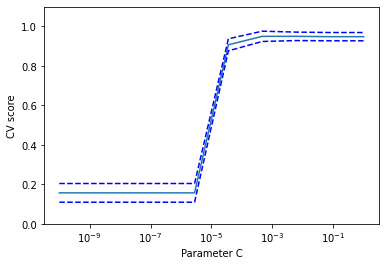

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.semilogx(C_s, scores) # valores medios
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), "b--") 
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), "b--")

plt.ylabel("CV score")
plt.xlabel("Parameter C")
plt.ylim(0, 1.1)
plt.show()

### **Grid-search and cross-validation estimators**

`Sklearn` tiene un objeto que es capaz de, dado los datos, computar el rendimiento del algoritmo para un conjunto de parametros dados y asi regresar el que logro un mayor desempeño.

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score 
from sklearn.svm import SVC
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
svc = SVC(kernel='linear')
Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs), n_jobs=-1)
clf.fit(X_digits[:1000], y_digits[:1000])


GridSearchCV(estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])})

In [ ]:
clf.best_score_

0.95

In [ ]:
clf.best_estimator_

SVC(C=0.0021544346900318843, kernel='linear')

Por defecto, el metodo `GridSearchCV` ocupa 5 "carpetas" para el **cross-validation**.

**Nested cross-validation**




2 ciclos de cross-validation son ejecutados en paralelo: uno con el metodo de `GridSearchCV` para definir el parametro `gamma` y otro con el metodo de `cross_val_score` para obtener la metrica del mejor estimador. De esta manera, los resultados de los estimadores no se encontraran sesgados a los puntajes que pudieron haber obtenido con los nuevos datos

In [ ]:
from sklearn import linear_model, datasets 
lasso = linear_model.LassoCV()
X_diabetes, y_diabetes = datasets.load_diabetes(return_X_y=True)
lasso.fit(X_diabetes, y_diabetes)


LassoCV()

In [ ]:
lasso.alpha_

0.003753767152692203

Estos estimadores son llamados de una manera similar con sus contrapartes con el CV añadidos a su nombre (**estos ya incluyen un proceso de cross-validation**)


### **Ejercicio**

Para la base de datos de diabetes, encuentra el parametro alpha que optimiza la regularizacion.

In [ ]:
from sklearn.linear_model import LassoCV 
from sklearn.linear_model import Lasso 
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV 

X, y = datasets.load_diabetes(return_X_y=True)
X = X[:150]
y = y[:150]

In [ ]:
regr = Lasso()
k_fold = KFold()
alphas = np.logspace(-4, -0.5, 30)
grid_search_cv = GridSearchCV(regr, param_grid=dict(alpha=alphas), cv=k_fold)
grid_search_cv.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.395e+02, tolerance: 7.284e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.113e+01, tolerance: 7.284e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])})

In [ ]:
grid_search_cv.best_params_

{'alpha': 0.07880462815669913}

¿que tanto podemos confiar de este parametro `alpha`?

In [ ]:
regr = LassoCV(alphas=alphas, random_state=0, max_iter=10000)
k_fold = KFold(3)
grupos = k_fold.split(X, y)
scores = []
alphas = []
for train, test in grupos:
  regr.fit(X[train], y[train])
  acc = regr.score(X[test], y[test])
  scores.append(acc)
  alphas.append(regr.alpha_)

In [ ]:
alphas

[0.05968456995122311, 0.04520353656360245, 0.07880462815669913]

In [ ]:
scores

[0.5420934847477341, 0.15522627264991862, 0.45192716814674017]

**Respuesta:** No se puede confiar mucho en el valor del parametro `alpha`, ya que este varia dependiendo del subconjunto de datos y, por sobre de todo, el puntaje por alpha cambia drasticamente.

## **Unsupervised learning: seeking representations of the data**

### **Clustering: grouping observations together**


**El problema que resolvemos con Clustering**

Al utilizar la base de datos iris, nosotros podemos observar que existen 3 tipo de iris (Lirios), sin embargo, no tenemos acceso a la taxonomia de la etiqueta puestos en estos. Lo que podriamos tratar entonces en realizar una tarea de **clustering**. Asi, lo que haremos es separar las observaciones en grupos denominados "clusters"

**K-means clustering**

Antes de empezar debemos mencionar que existen varios criterios de agrupacion junto a los algoritmos asociados. En particular k-mean clustering es uno de los mas sencillos de ellos.

In [ ]:
from sklearn import  cluster, datasets 
X_iris, y_iris = datasets.load_iris(return_X_y=True) 

k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris)
                                    

KMeans(n_clusters=3)

In [ ]:
# Etiquetas designadas por el algoritmo
k_means.labels_[::10]

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
# Etiquetas reales de los datos 
y_iris[::10]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

**Warning**: Con este procedimiento no se encuentra asegurado ningun nuevo hallazgo en los datos. En primer lugar, la tarea de definir un numero exactos de cluster es dificil y en segundo lugar, el algoritmo es tremendamente variable en funcion de la inicializacion, cayendo en un **minimo local**.

**Application example: vector quantification**



Clustering, y en particular con `KMeans`, pueden ser vistos como una manera de escoger un pequeño numero de ejemplares para comprimir la informacion. Este problema en algunas ocaciones es conocido como **vector quantization**. Por el momento, esto lo podriamos utilizar para la **posterizacion (pasar de tonos continuos a unos pocos)** de una imagen.

In [ ]:
import scipy as sp 
try:
  face = sp.face(grey=True)
except AttributeError:
  from scipy import misc
  face = misc.face(gray=True)

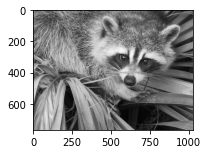

In [ ]:
import matplotlib.pyplot as plt
# Imagen original
plt.figure(1, figsize=(3, 2.2))
plt.imshow(face, cmap=plt.cm.gray)

In [ ]:
# Miremos como esta construida esta imagen
face.shape

(768, 1024)

In [ ]:
# Lo que estamos haciendo aqui es adaptando la imagen a ala estructura
# (n_sample, n_feature), asi cada pixel de la imagen pasa a ser una muestra
# y la unica caracteristica que presenta es un valor entre 0 a 255 para la escala
# de grises
X = face.reshape((-1, 1))
X.shape

(786432, 1)

In [ ]:
# Agrupamos los pixeles en 5 grupos (clusters)
k_means = cluster.KMeans(n_clusters=5, n_init=1)
k_means.fit(X)

KMeans(n_clusters=5, n_init=1)

In [ ]:
# Estos son los valores de escalar de grises que se ocuparian
values = k_means.cluster_centers_.squeeze()
values

array([194.13840989,  27.62031146, 114.99362851, 153.31393344,
        75.41095451])

In [ ]:
# Estas son las clases que representan cada uno de estos valores (colores de grises)
import numpy as np
labels = k_means.labels_
np.unique(labels)

array([0, 1, 2, 3, 4], dtype=int32)

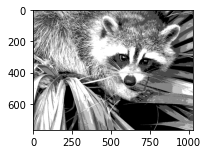

In [ ]:
# Generamos la nueva imagen
face_compressed = np.choose(labels, values) # Para cada label le asignamos su escala de gris
face_compressed.shape = face.shape # Dejamos a la nueva imagen con las mismas dim originales
plt.figure(1, figsize=(3, 2.2))
plt.imshow(face_compressed, cmap=plt.cm.gray)

**Hieratical agglomerative clustering: Ward**



Hieratical clustering es un tipo de analsis por agrupaciones que tiene por objetivo construi una jerarquia. En general podemos diferenciar 2 de ellas:

- **Agglometative**: Foco ascendente, cada observacion parte en un grupo, e iterativamente se van mezclando los grupos buscando minimizar un criterio **linkage (de vinculacion)**. Es recomendable usar este metodo si se cuentan con pocas observaciones. Por otro lado, si existen un gran numero de **clusters** entonces es recomendable usar K-means.

- **Divisive**: Foco descendente. Todas las observaciones comienzan en un cluster e iterativamente se van segmentando las observaciones en algunos nuevos. Tambien es importante señalar que para un gran numero de **clusters** este algoritmo es lento de entrenar, ya que tiene que partir desde un todo agrupado.

**Conectivity-constrained clustering**

Con el metodo de **agglomerative clustering**, es posible especificar cuales muestras seran clasificadas juntas, a traves de un **connectivity graph (grafico de concetividad)**. Usualmente se utiliza una matriz de dispersa. Esto puede ser util, por ejemplo, para conectar regiones de una imagen.

In [ ]:
# Importamos bibliotecas
from skimage.data import coins 
from scipy.ndimage.filters import gaussian_filter 
from skimage.transform import rescale
import numpy as np

In [ ]:
# Imagen de monedas
rescaled_coins = rescale(
    image=gaussian_filter(coins(), sigma=2), 
    scale=0.2, 
    mode='reflect', 
    anti_aliasing=False, 
    multichannel=False)

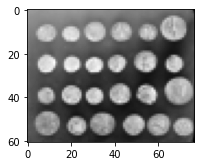

In [ ]:
# Visualizacion
import matplotlib.pyplot as plt

plt.figure(1, figsize=(3, 4))
plt.imshow(rescaled_coins, cmap=plt.cm.gray)

In [ ]:
print(rescaled_coins.shape) # dimensiones de antes
X = np.reshape(rescaled_coins, (-1, 1))
print(X.shape) # dimensiones tipo (n_samples, n_features) -> (pixel, color)

(61, 77)
(4697, 1)


In [ ]:
from sklearn.feature_extraction import grid_to_graph 
connectivity = grid_to_graph(*rescaled_coins.shape)

In [ ]:
connectivity # matriz de dispersion (pixel, pixel)

<4697x4697 sparse matrix of type '<class 'numpy.int64'>'
	with 23209 stored elements in COOrdinate format>

In [ ]:
n_clusters = 27
from sklearn.cluster import AgglomerativeClustering 
ward = AgglomerativeClustering(n_clusters, linkage='ward', 
                               connectivity=connectivity)
ward.fit(X)

AgglomerativeClustering(connectivity=<4697x4697 sparse matrix of type '<class 'numpy.int64'>'
	with 23209 stored elements in COOrdinate format>,
                        n_clusters=27)

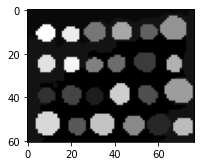

In [ ]:
label = np.reshape(ward.labels_, rescaled_coins.shape)
plt.figure(1, figsize=(3, 4))
plt.imshow(label, cmap=plt.cm.gray)

**Feature agglomeration**

Ahora hemos visto como la dispersion puede ser usada para mitigar la maldicion de la dimensionalidad. Otro uso que podemos darle es **mezclar variables (features)** que sean **similares**

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()
images = digits.images 
X = np.reshape(images, (len(images), -1))
X.shape # (n_samples, features) -> (imagenes, 8x8 pixeles)

(1797, 64)

In [ ]:
from sklearn import cluster
connectivity = grid_to_graph(*images[0].shape)
agglo = cluster.FeatureAgglomeration(connectivity=connectivity, 
                                     n_clusters=32)
agglo.fit(X)

FeatureAgglomeration(connectivity=<64x64 sparse matrix of type '<class 'numpy.int64'>'
	with 288 stored elements in COOrdinate format>,
                     n_clusters=32)

In [ ]:
X_reduced = agglo.transform(X)
X_reduced.shape

(1797, 32)

In [ ]:
X_approx = agglo.inverse_transform(X_reduced)
images_approx = np.reshape(X_approx, images.shape)

In [ ]:
images_approx.shape

(1797, 8, 8)

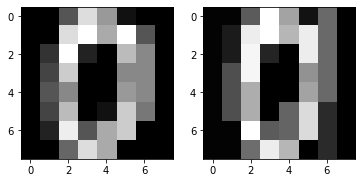

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(images[0], cmap=plt.cm.gray)
ax2.imshow(images_approx[0], cmap=plt.cm.gray)

**`transform` and `inverse_transform` methods**

Algunos estimadores utilizan un metodo de transformacion, por ahora, para reducir la dimensionalidad en los datos

### **Decompositions: from a signal to components and loadings**

**Components and loadings**

si nuestra X se corresponde con datos multivariable, entonces el problema que estamos tratando de resolver es reescribirlo en una nueva base: Asi, esperamos aprender **loadings L** y un set de **componenetes C** de tal forma que $X = LC$. En consecuencia, para definir estos componentes existen diferentes criterios que podemos aplicar. 

**Principal component analysis: PCA**

Principal component analysis (PCA) seleccion de manera sucesiva aquellos componentes que maximizan una señal de variacion.

Cuando buscamos transformar datos, PCA puede reducir la dimensionalidad presente en estos proyectando su principal subespacio.

In [ ]:
import numpy as np
x1 = np.random.normal(size=100) 
x2 = np.random.normal(size=100)
x3 = x1 + x2 
X = np.c_[x1, x2, x3]

In [ ]:
from sklearn import decomposition 
pca = decomposition.PCA()
pca.fit(X)

PCA()

In [ ]:
pca.explained_variance_ 

array([2.58793624e+00, 1.01018854e+00, 2.36816403e-32])

In [ ]:
pca.singular_values_

array([16.00642644, 10.00043324])

In [ ]:
pca.n_components = 2 
X_reduced = pca.fit_transform(X)
X_reduced.shape

(100, 2)

**Independent component analisis: ICA**



Independent component analysis (ICA) selecciona aquellas componentes con las cuales las distribuciones de los loadings cargan la mayor cantidad de informacion de manera independiente.

In [ ]:
import numpy as np 
from scipy import signal 
time = np.linspace(0, 10, 2000)
s1 = np.sin(2*time)
s2 = np.sign(np.sin(3*time))
s3 = signal.sawtooth(2*np.pi*time)

S = np.c_[s1, s2, s3]
S += np.random.normal(size=S.shape)
S /= S.std(axis=0)

A = np.array([[1, 1, 1], [0.5, 2, 1], [1.5, 1, 2]])
X = np.dot(S, A.T)


In [ ]:
X.shape

(2000, 3)

In [ ]:
ica = decomposition.FastICA()
S_ = ica.fit_transform(X)
A_ = ica.mixing_.T 
np.allclose(X, np.dot(S_, A_) + ica.mean_) # esto es para captar que tan parecidos son estaos dos elementos

True

In [ ]:
# Otra manera de verlo es con el error o distancia entre ambos elementos
A = X
B = np.dot(S_, A_) + ica.mean_
error = np.sum((A - B)**2) / (A.shape[0]*A.shape[1])
error # el error es muy pequeño, lo cual demuestra que el metodo ica capto bien las fuentes

8.765724329923032e-30

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)

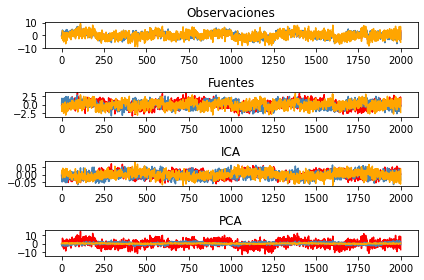

In [ ]:
import matplotlib.pyplot as plt

plt.figure()

models = [X, S, S_, H]
names = ['Observaciones', 'Fuentes', 'ICA', 'PCA']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
  plt.subplot(4, 1, ii)
  plt.title(name)
  for sig, color in zip(model.T, colors):
    plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

## **Putting it all together**

### **Pipelining**

Ya hemos visto como algunos estimadores pueden transformar los datos y como otros pueden pueden predecir variables. De esta manera, lo que tambien podriamos hacer es combinar estos dos tipos de estimadores.

In [ ]:
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV 
from sklearn import datasets
import numpy as np

In [ ]:
# Lo que vamos a hacer es un pipeline que utilice un PCA y un metodo de clasificacion 
pca = PCA()

logistic = LogisticRegression(max_iter=10000, tol=0.1) # colocando un tol mas alto hace al ejercicio trabajar mas rapido
pipe = Pipeline(steps=[("pca", pca), ("logistic", logistic)])

X_digits, y_digits = datasets.load_digits(return_X_y=True)

param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64], 
    'logistic__C': np.logspace(-4, 4, 4),
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_digits, y_digits)


GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(max_iter=10000,
                                                           tol=0.1))]),
             n_jobs=-1,
             param_grid={'logistic__C': array([1.00000000e-04, 4.64158883e-02, 2.15443469e+01, 1.00000000e+04]),
                         'pca__n_components': [5, 15, 30, 45, 64]})

In [ ]:
search.best_score_

0.9198885793871865

In [ ]:
search.best_params_

{'logistic__C': 0.046415888336127774, 'pca__n_components': 45}

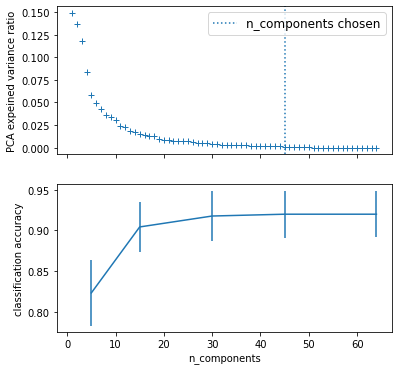

In [ ]:
# grafiquemos el analisis de PCA
import matplotlib.pyplot as plt

pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6)) 
ax0.plot(np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA expeined variance ratio')

ax0.axvline(
    search.best_estimator_.named_steps['pca'].n_components, 
    linestyle=':', 
    label='n_components chosen'
)
ax0.legend(prop=dict(size=12))

import pandas as pd
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot( 
    x=components_col, y='mean_test_score', yerr='std_test_score', legend=False, ax=ax1
)
ax1.set_ylabel('classification accuracy')
ax1.set_xlabel('n_components')

plt.show()

### **Face recognitions with eigenfaces**

In [ ]:
from time import time
import logging 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV 
from sklearn.datasets import fetch_lfw_people 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.decomposition import PCA 
from sklearn.svm import SVC 

In [ ]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

n_samples, h, w = lfw_people.images.shape

X = lfw_people.data 
n_features = X.shape[1] 

y = lfw_people.target 
target_names = lfw_people.target_names 
n_classes = target_names.shape[0]

print(f'n_samples: {n_samples}')
print(f'n_features: {n_features}')
print(f'n_classes: {n_classes}')

n_samples: 1288
n_features: 1850
n_classes: 7


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
n_components = 150 

t0 = time()
pca = PCA(n_components=n_components, 
          svd_solver='randomized', 
          whiten=True).fit(X_train)

print(f'terminado en {time() - t0} segundos')

terminado en 0.4954359531402588 segundos


In [ ]:
eigenfaces = pca.components_.reshape((n_components, h, w))

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
param_grid = {
    'C': [1e3, 5e3, 1e4, 5e4, 1e5], 
    'gamma' : [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]
}

clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)

clf.best_estimator_

SVC(C=1000.0, class_weight='balanced', gamma=0.005)

In [ ]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))


                   precision    recall  f1-score   support

     Ariel Sharon       0.88      0.54      0.67        13
     Colin Powell       0.81      0.87      0.84        60
  Donald Rumsfeld       0.94      0.59      0.73        27
    George W Bush       0.81      0.98      0.89       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.53      0.70        15
       Tony Blair       1.00      0.75      0.86        36

         accuracy                           0.85       322
        macro avg       0.91      0.72      0.79       322
     weighted avg       0.86      0.85      0.84       322



In [ ]:
confusion_matrix(y_test, y_pred, labels=range(n_classes))

array([[  7,   1,   0,   5,   0,   0,   0],
       [  1,  52,   0,   7,   0,   0,   0],
       [  0,   2,  16,   9,   0,   0,   0],
       [  0,   3,   0, 143,   0,   0,   0],
       [  0,   1,   0,   4,  20,   0,   0],
       [  0,   4,   0,   2,   1,   8,   0],
       [  0,   1,   1,   7,   0,   0,  27]])

In [ ]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [ ]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)

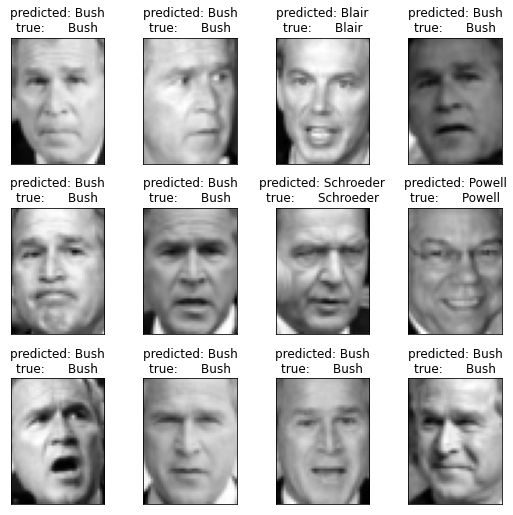

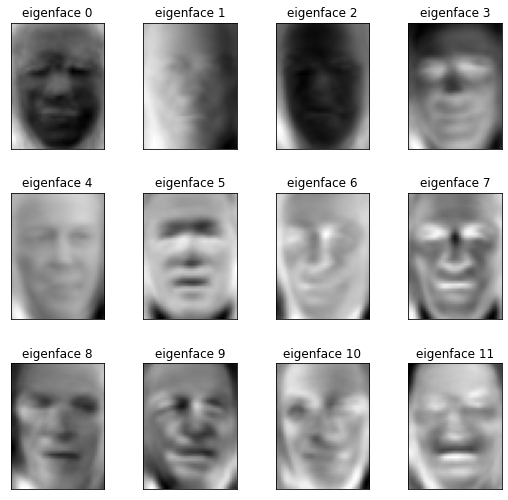

In [ ]:
prediction_titles = [
    title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()